In [40]:
from ipynb.fs.full.TARGET_Analysis_Functions import *
from ipynb.fs.full.ACE2_SCA_Analysis import *
from scipy.stats import chi2_contingency

# IFITM3 SCA Analysis

# Compare EFS in all samples with copy number data stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=1.662e-01 stat=-1.415e+00
Intermediate v.s. High: t-test independent samples, P_val=2.440e-01 stat=1.183e+00
Low v.s. High: t-test independent samples, P_val=6.103e-01 stat=-5.149e-01


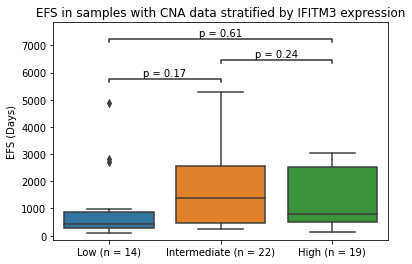

Low: median = 446.5, mean = 1068.4285714285713, 95% CI = (336.1167244887389, 1800.7404183684039)
Intermediate: median = 1376.5, mean = 1789.8636363636363, 95% CI = (1143.6801675152174, 2436.047105212055)
High: median = 802.0, mean = 1289.8947368421052, 95% CI = (806.2833155814831, 1773.5061581027273)


In [64]:
cna_samples = cna_data['ID'].unique()

#Find z-scores samples with CNA data
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(cna_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

#Obtain the IFITM3 z-scores in sca samples
IFITM3_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_sca_samples = intermediate_IFITM3_sca_samples.loc[intermediate_IFITM3_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_sca_samples,intermediate_IFITM3_sca_samples,high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in samples with CNA data stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')


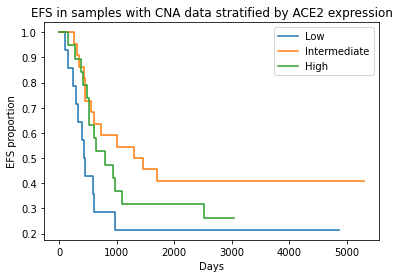

Log Rank Test between Low and Intermediate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.43 0.06      3.96

Log Rank Test between Low and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.20 0.27      1.87

Log Rank Test between Intermediate and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.83 0.36      1.46

In [65]:
kaplanmeierEFS2(data, 'EFS in samples with CNA data stratified by ACE2 expression', ['Low','Intermediate','High'])




High IFITM3 samples v.s. Remaining samples: t-test independent samples, P_val=5.773e-01 stat=-5.608e-01


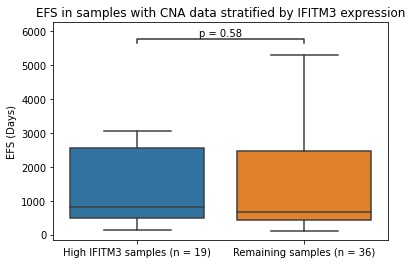

High IFITM3 samples: median = 802.0, mean = 1289.8947368421052, 95% CI = (806.2833155814831, 1773.5061581027273)
Remaining samples: median = 665.5, mean = 1509.3055555555557, 95% CI = (1015.1988416373717, 2003.4122694737396)


In [66]:
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index
not_high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < 0.5].index

data = [high_IFITM3_sca_samples,not_high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in samples with CNA data stratified by IFITM3 expression', ['High IFITM3 samples','Remaining samples'],'t-test_ind')


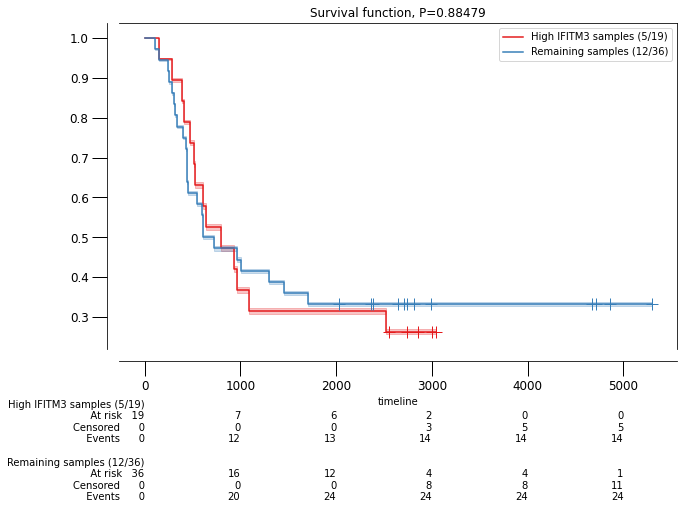

In [67]:
kaplanmeierEFS(data,'High IFITM3 samples','Remaining samples')

In [31]:
#Find number of samples with CNA data that have MYCN amplification
samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['Sample Identifier'].isin(cna_samples)]
amplified_MYCN_count = sum(samples['MYCN']=='Amplified')
amplified_MYCN_prop = amplified_MYCN_count/len(samples)
print("Number of MYCN amplified tumors in CNA samples: " + str(amplified_MYCN_count) + "/" + str(len(samples)))
print("Proportion of MYCN amplified tumors in CNA samplles: " + str(amplified_MYCN_prop))
    
    
    

Number of MYCN amplified tumors in CNA samples: 14/59
Proportion of MYCN amplified tumors in CNA samplles: 0.23728813559322035


# Chromosome 1p loss analysis

No Loss v.s. Loss: t-test independent samples, P_val=3.354e-03 stat=3.072e+00


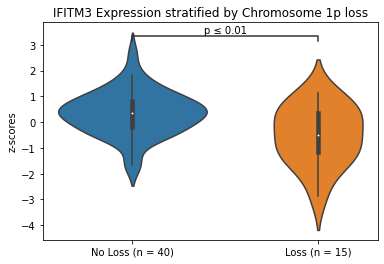

No Loss: median = 0.35655, mean = 0.35502500000000003, 95% CI = (0.09270163392963071, 0.6173483660703694)
Loss: median = -0.5002, mean = -0.5078866666666666, 95% CI = (-1.0765687620785853, 0.06079542874525212)


In [5]:
#Compare IFITM3 expression between samples with and without 1p loss
compareExpression2('IFITM3',[ch1p_non_loss_samples,ch1p_loss_samples],'Chromosome 1p loss',['No Loss','Loss'],'t-test_ind')



### Compare prevalence of 1p loss in groups stratified by IFITM3 expression

In [50]:
#Compare across low, intermediate, and high expression groups
IFITM3_groups = stratifyDataOnGeneExpression2('IFITM3',-0.5,0.5)

groups_count = [0,0,0]
i=0
for group in IFITM3_groups:
    for sample in group:
        if(sample in ch1p_loss_samples):
            groups_count[i]+=1
    i+=1

low_per = groups_count[0]/len((set(IFITM3_groups[0])).intersection(set(cna_samples))) * 100
intermediate_per = groups_count[1]/len((set(IFITM3_groups[1])).intersection(set(cna_samples))) * 100
high_per = groups_count[2]/len((set(IFITM3_groups[2])).intersection(set(cna_samples))) * 100
print("Number of Low IFITM3 samples with 1p loss: " + str(groups_count[0]) + "/" + str(len((set(IFITM3_groups[0])).intersection(set(cna_samples)))) + " (" + str(low_per) + "%)")
print("Number of Intermediate IFITM3 samples with 1p loss: " + str(groups_count[1]) + "/" + str(len((set(IFITM3_groups[1])).intersection(set(cna_samples)))) + " (" + str(intermediate_per) + "%)")
print("Number of High IFITM3 samples with 1p loss: " + str(groups_count[2]) + "/" + str(len((set(IFITM3_groups[2])).intersection(set(cna_samples)))) + " (" + str(high_per) + "%)")



Number of Low IFITM3 samples with 1p loss: 8/14 (57.14285714285714%)
Number of Intermediate IFITM3 samples with 1p loss: 4/22 (18.181818181818183%)
Number of High IFITM3 samples with 1p loss: 3/19 (15.789473684210526%)
p-value from Chi-Squared Test: 0.014426019336470133


In [ ]:
#Chi-Squared Test comparing all three groups
contingency_table = [[14-8,22-4,19-3],[8,4,3]]
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p-value from Chi-Squared Test: " + str(p))

### Compare EFS in samples with 1p loss stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=2.044e-01 stat=-1.358e+00
Intermediate v.s. High: t-test independent samples, P_val=4.889e-02 stat=2.589e+00
Low v.s. High: t-test independent samples, P_val=3.890e-01 stat=9.051e-01


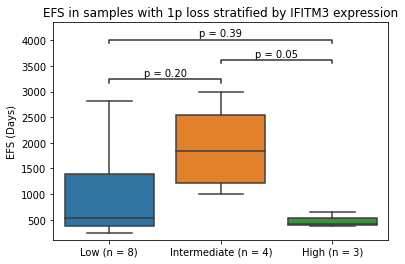

Low: median = 525.0, mean = 1062.5, 95% CI = (320.4469009155674, 1804.5530990844327)
Intermediate: median = 1841.5, mean = 1919.75, 95% CI = (1007.1759600910569, 2832.324039908943)
High: median = 415.0, mean = 482.3333333333333, 95% CI = (321.1058599234909, 643.5608067431757)


In [19]:
#Find z-scores for 1p loss samples
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(ch1p_loss_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

#Obtain the IFITM3 z-scores in sca samples
IFITM3_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_sca_samples = intermediate_IFITM3_sca_samples.loc[intermediate_IFITM3_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_sca_samples,intermediate_IFITM3_sca_samples,high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in samples with 1p loss stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')



### Compare EFS in samples without 1p loss stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=4.069e-01 stat=-8.455e-01
Intermediate v.s. High: t-test independent samples, P_val=5.217e-01 stat=6.479e-01
Low v.s. High: t-test independent samples, P_val=5.753e-01 stat=-5.696e-01


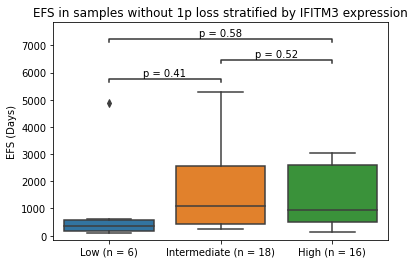

Low: median = 364.5, mean = 1076.3333333333333, 95% CI = (-415.47272449957654, 2568.139391166243)
Intermediate: median = 1088.5, mean = 1761.0, 95% CI = (988.5173943377337, 2533.4826056622665)
High: median = 950.0, mean = 1441.3125, 95% CI = (897.7665762561803, 1984.8584237438197)


In [21]:
#Find z-scores for samples without 1p loss
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(ch1p_non_loss_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

#Obtain the IFITM3 z-scores in sca samples
IFITM3_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_sca_samples = intermediate_IFITM3_sca_samples.loc[intermediate_IFITM3_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_sca_samples,intermediate_IFITM3_sca_samples,high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in samples without 1p loss stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')



# Chromosome 11q loss analysis

No Loss v.s. Loss: t-test independent samples, P_val=6.548e-01 stat=-4.497e-01


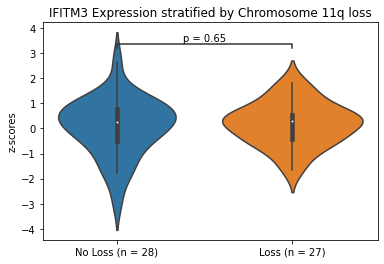

No Loss: median = 0.2696, mean = 0.05984285714285716, 95% CI = (-0.3603080156511135, 0.47999372993682776)
Loss: median = 0.2968, mean = 0.18174444444444443, 95% CI = (-0.13901994277930213, 0.5025088316681909)


In [6]:
#Compare IFITM3 expression between samples with and without 11q loss
compareExpression2('IFITM3',[ch11q_non_loss_samples,ch11q_loss_samples],'Chromosome 11q loss',['No Loss','Loss'],'t-test_ind')




### Compare prevalence of 11q loss in samples stratified by IFITM3 expression

In [51]:
#Compare across low, intermediate, and high expression groups
IFITM3_groups = stratifyDataOnGeneExpression2('IFITM3',-0.5,0.5)

groups_count = [0,0,0]
i=0
for group in IFITM3_groups:
    for sample in group:
        if(sample in ch11q_loss_samples):
            groups_count[i]+=1
    i+=1

low_per = groups_count[0]/len((set(IFITM3_groups[0])).intersection(set(cna_samples))) * 100
intermediate_per = groups_count[1]/len((set(IFITM3_groups[1])).intersection(set(cna_samples))) * 100
high_per = groups_count[2]/len((set(IFITM3_groups[2])).intersection(set(cna_samples))) * 100
print("Number of Low IFITM3 samples with 11q loss: " + str(groups_count[0]) + "/" + str(len((set(IFITM3_groups[0])).intersection(set(cna_samples)))) + " (" + str(low_per) + "%)")
print("Number of Intermediate IFITM3 samples with 11q loss: " + str(groups_count[1]) + "/" + str(len((set(IFITM3_groups[1])).intersection(set(cna_samples)))) + " (" + str(intermediate_per) + "%)")
print("Number of High IFITM3 samples with 11q loss: " + str(groups_count[2]) + "/" + str(len((set(IFITM3_groups[2])).intersection(set(cna_samples)))) + " (" + str(high_per) + "%)")





Number of Low IFITM3 samples with 11q loss: 6/14 (42.857142857142854%)
Number of Intermediate IFITM3 samples with 11q loss: 13/22 (59.09090909090909%)
Number of High IFITM3 samples with 11q loss: 8/19 (42.10526315789473%)


In [52]:
#Chi-Squared Test comparing all three groups
contingency_table = [[14-6,22-13,19-8],[6,13,8]]
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p-value from Chi-Squared Test: " + str(p))

p-value from Chi-Squared Test: 0.47975126445026994


### Compare EFS in samples with 11q loss stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=4.004e-01 stat=-8.625e-01
Intermediate v.s. High: t-test independent samples, P_val=3.552e-01 stat=9.477e-01
Low v.s. High: t-test independent samples, P_val=8.887e-01 stat=-1.430e-01


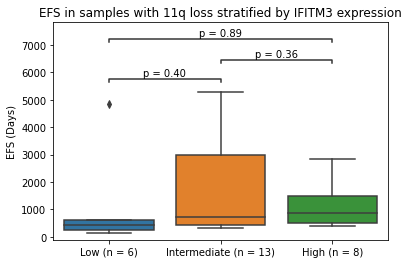

Low: median = 443.0, mean = 1125.5, 95% CI = (-347.3662492037672, 2598.3662492037674)
Intermediate: median = 721.0, mean = 1930.4615384615386, 95% CI = (891.2935273016328, 2969.6295496214443)
High: median = 885.0, mean = 1234.375, 95% CI = (545.78768642371, 1922.96231357629)


In [22]:
#Find z-scores for 11q loss samples
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(ch11q_loss_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

#Obtain the IFITM3 z-scores in sca samples
IFITM3_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_sca_samples = intermediate_IFITM3_sca_samples.loc[intermediate_IFITM3_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_sca_samples,intermediate_IFITM3_sca_samples,high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in samples with 11q loss stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')



### Compare EFS in samples without 11q loss stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=2.532e-01 stat=-1.188e+00
Intermediate v.s. High: t-test independent samples, P_val=5.912e-01 stat=5.468e-01
Low v.s. High: t-test independent samples, P_val=5.745e-01 stat=-5.725e-01


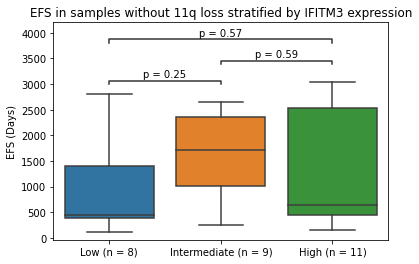

Low: median = 446.5, mean = 1025.625, 95% CI = (265.08420375828916, 1786.1657962417107)
Intermediate: median = 1707.0, mean = 1586.7777777777778, 95% CI = (1033.5465483663925, 2140.009007189163)
High: median = 646.0, mean = 1330.2727272727273, 95% CI = (634.3704294334647, 2026.1750251119897)


In [23]:
#Find z-scores for samples without 11q loss
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(ch11q_non_loss_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

#Obtain the IFITM3 z-scores in sca samples
IFITM3_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_sca_samples = intermediate_IFITM3_sca_samples.loc[intermediate_IFITM3_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_sca_samples,intermediate_IFITM3_sca_samples,high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in samples without 11q loss stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')



# Chromosome 17q gain analysis

No Gain v.s. Gain: t-test independent samples, P_val=7.785e-01 stat=2.827e-01


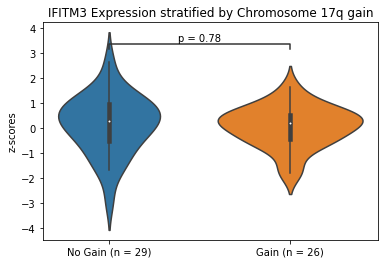

No Gain: median = 0.3098, mean = 0.15600689655172414, 95% CI = (-0.2656767627452111, 0.5776905558486594)
Gain: median = 0.22565000000000002, mean = 0.07917307692307689, 95% CI = (-0.22909534695608813, 0.38744150080224193)


In [7]:
#Compare IFITM3 expression between samples with and without 17q gain
compareExpression2('IFITM3',[ch17q_non_gain_samples,ch17q_gain_samples],'Chromosome 17q gain',['No Gain','Gain'],'t-test_ind')




### Compare prevalence of 17q gain in samples stratified by IFITM3 expression

In [53]:
#Compare across low, intermediate, and high expression groups
IFITM3_groups = stratifyDataOnGeneExpression2('IFITM3',-0.5,0.5)

groups_count = [0,0,0]
i=0
for group in IFITM3_groups:
    for sample in group:
        if(sample in ch17q_gain_samples):
            groups_count[i]+=1
    i+=1

low_per = groups_count[0]/len((set(IFITM3_groups[0])).intersection(set(cna_samples))) * 100
intermediate_per = groups_count[1]/len((set(IFITM3_groups[1])).intersection(set(cna_samples))) * 100
high_per = groups_count[2]/len((set(IFITM3_groups[2])).intersection(set(cna_samples))) * 100
print("Number of Low IFITM3 samples with 17q gain: " + str(groups_count[0]) + "/" + str(len((set(IFITM3_groups[0])).intersection(set(cna_samples)))) + " (" + str(low_per) + "%)")
print("Number of Intermediate IFITM3 samples with 17q gain: " + str(groups_count[1]) + "/" + str(len((set(IFITM3_groups[1])).intersection(set(cna_samples)))) + " (" + str(intermediate_per) + "%)")
print("Number of High IFITM3 samples with 17q gain: " + str(groups_count[2]) + "/" + str(len((set(IFITM3_groups[2])).intersection(set(cna_samples)))) + " (" + str(high_per) + "%)")





Number of Low IFITM3 samples with 17q gain: 6/14 (42.857142857142854%)
Number of Intermediate IFITM3 samples with 17q gain: 13/22 (59.09090909090909%)
Number of High IFITM3 samples with 17q gain: 7/19 (36.84210526315789%)


In [54]:
#Chi-Squared Test comparing all three groups
contingency_table = [[14-6,22-13,19-7],[6,13,7]]
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p-value from Chi-Squared Test: " + str(p))

p-value from Chi-Squared Test: 0.3376313894107117


### Compare EFS in samples with 17q gain stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=3.193e-01 stat=-1.026e+00
Intermediate v.s. High: t-test independent samples, P_val=2.920e-01 stat=1.086e+00
Low v.s. High: t-test independent samples, P_val=8.952e-01 stat=-1.348e-01


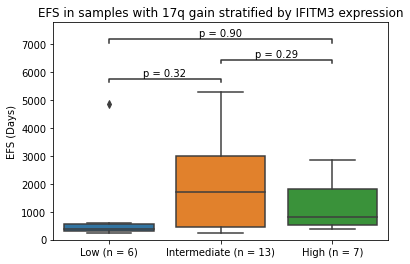

Low: median = 386.5, mean = 1130.5, 95% CI = (-336.46609401235514, 2597.466094012355)
Intermediate: median = 1707.0, mean = 2067.4615384615386, 95% CI = (1057.7422939608427, 3077.1807829622344)
High: median = 802.0, mean = 1239.142857142857, 95% CI = (481.2278328016306, 1997.0578814840837)


In [24]:
#Find z-scores for 17q gain samples
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(ch17q_gain_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

#Obtain the IFITM3 z-scores in sca samples
IFITM3_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_sca_samples = intermediate_IFITM3_sca_samples.loc[intermediate_IFITM3_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_sca_samples,intermediate_IFITM3_sca_samples,high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in samples with 17q gain stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')



### Compare EFS in samples without 17q gain stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=4.607e-01 stat=-7.571e-01
Intermediate v.s. High: t-test independent samples, P_val=8.823e-01 stat=1.501e-01
Low v.s. High: t-test independent samples, P_val=5.718e-01 stat=-5.759e-01


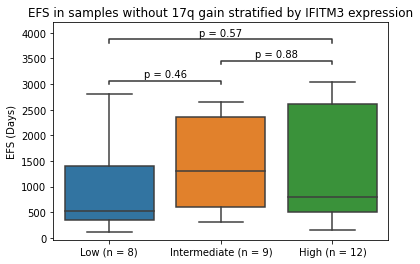

Low: median = 516.5, mean = 1021.875, 95% CI = (255.5294904453715, 1788.2205095546285)
Intermediate: median = 1297.0, mean = 1388.888888888889, 95% CI = (806.0872232443985, 1971.6905545333793)
High: median = 789.0, mean = 1319.5, 95% CI = (669.6106220180549, 1969.389377981945)


In [25]:
#Find z-scores for samples without 17q gain
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(ch17q_non_gain_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

#Obtain the IFITM3 z-scores in sca samples
IFITM3_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_sca_samples = intermediate_IFITM3_sca_samples.loc[intermediate_IFITM3_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_sca_samples,intermediate_IFITM3_sca_samples,high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in samples without 17q gain stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')



# Chromosome 1p and 11q loss + Chromosome 17q gain

No SCA v.s. SCA: t-test independent samples, P_val=1.278e-01 stat=1.547e+00


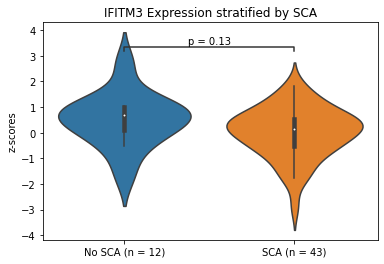

No SCA: median = 0.69155, mean = 0.5086833333333334, 95% CI = (-0.07522618323631569, 1.0925928499029824)
SCA: median = 0.1545, mean = 0.011127906976744163, 95% CI = (-0.279497097293317, 0.3017529112468053)


In [10]:
#Compare IFITM3 expression between samples with and without SCA
compareExpression2('IFITM3',[non_sca_samples,sca_samples],'SCA',['No SCA','SCA'],'t-test_ind')

### Compare prevalence of SCA in groups stratified by IFITM3 expression

In [41]:
#Compare across low, intermediate, and high expression groups
IFITM3_groups = stratifyDataOnGeneExpression2('IFITM3',-0.5,0.5)

groups_count = [0,0,0]
i=0
for group in IFITM3_groups:
    for sample in group:
        if(sample in sca_samples):
            groups_count[i]+=1
    i+=1

low_per = groups_count[0]/len((set(IFITM3_groups[0])).intersection(set(cna_samples))) * 100
intermediate_per = groups_count[1]/len((set(IFITM3_groups[1])).intersection(set(cna_samples))) * 100
high_per = groups_count[2]/len((set(IFITM3_groups[2])).intersection(set(cna_samples))) * 100
print("Number of Low IFITM3 samples with SCA: " + str(groups_count[0]) + "/" + str(len((set(IFITM3_groups[0])).intersection(set(cna_samples)))) + " (" + str(low_per) + "%)")
print("Number of Intermediate IFITM3 samples with SCA: " + str(groups_count[1]) + "/" + str(len((set(IFITM3_groups[1])).intersection(set(cna_samples)))) + " (" + str(intermediate_per) + "%)")
print("Number of High IFITM3 samples with SCA: " + str(groups_count[2]) + "/" + str(len((set(IFITM3_groups[2])).intersection(set(cna_samples)))) + " (" + str(high_per) + "%)")





Number of Low IFITM3 samples with SCA: 12/14 (85.71428571428571%)
Number of Intermediate IFITM3 samples with SCA: 19/22 (86.36363636363636%)
Number of High IFITM3 samples with SCA: 12/19 (63.1578947368421%)


In [42]:
#Chi-Squared Test comparing all three groups
contingency_table = [[14-12,22-19,19-12],[12,19,12]]
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p-value from Chi-Squared Test: " + str(p))

p-value from Chi-Squared Test: 0.14637111713278728


In [44]:
#using z-score cutoff of 0 for activated pathway
#calculate prevalence in samples with high IFITM3 and remaining samples
IFITM3_groups = stratifyDataOnGeneExpression('IFITM3',0.5,0.5)

groups_count = [0,0]
i=0
for group in IFITM3_groups:
    for sample in group:
        if(sample in sca_samples):
            groups_count[i]+=1
    i+=1

high_per = groups_count[1]/len((set(IFITM3_groups[1])).intersection(set(cna_samples))) * 100
remaining_per = groups_count[0]/len((set(IFITM3_groups[0])).intersection(set(cna_samples))) * 100
print("Number of High IFITM3 samples with SCA: " + str(groups_count[1]) + "/" + str(len((set(IFITM3_groups[1])).intersection(set(cna_samples)))) + " (" + str(high_per) + "%)")
print("Number of Remaining IFITM3 samples with SCA: " + str(groups_count[0]) + "/" + str(len((set(IFITM3_groups[0])).intersection(set(cna_samples)))) + " (" + str(remaining_per) + "%)")





Number of High IFITM3 samples with SCA: 12/19 (63.1578947368421%)
Number of Remaining IFITM3 samples with SCA: 31/36 (86.11111111111111%)


In [45]:
#Chi-Squared Test comparing two groups
contingency_table = [[19-12,36-31],[12,31]]
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p-value from Chi-Squared Test: " + str(p))

p-value from Chi-Squared Test: 0.1059681598630925


# Compare EFS in SCA samples stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=3.284e-01 stat=-9.940e-01
Intermediate v.s. High: t-test independent samples, P_val=2.543e-01 stat=1.163e+00
Low v.s. High: t-test independent samples, P_val=9.551e-01 stat=5.697e-02


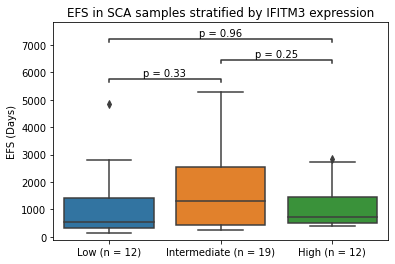

Low: median = 525.0, mean = 1201.0, 95% CI = (367.4119889104496, 2034.5880110895505)
Intermediate: median = 1297.0, mean = 1777.0526315789473, 95% CI = (1044.6499078206289, 2509.4553553372657)
High: median = 724.0, mean = 1172.1666666666667, 95% CI = (634.3962151420818, 1709.9371181912516)


In [56]:
#Find z-scores for sca samples
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(sca_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

#Obtain the IFITM3 z-scores in sca samples
IFITM3_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_sca_samples = intermediate_IFITM3_sca_samples.loc[intermediate_IFITM3_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_sca_samples = IFITM3_sca_z_scores.loc[IFITM3_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_sca_samples,intermediate_IFITM3_sca_samples,high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in SCA samples stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')



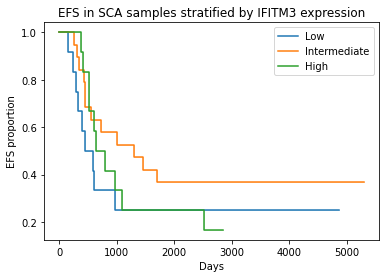

Log Rank Test between Low and Intermediate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.38 0.24      2.06

Log Rank Test between Low and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.22 0.64      0.64

Log Rank Test between Intermediate and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.88 0.35      1.52

In [57]:
kaplanmeierEFS2(data, 'EFS in SCA samples stratified by IFITM3 expression', ['Low','Intermediate','High'])




High IFITM3 samples v.s. Remaining samples: t-test independent samples, P_val=3.449e-01 stat=-9.551e-01


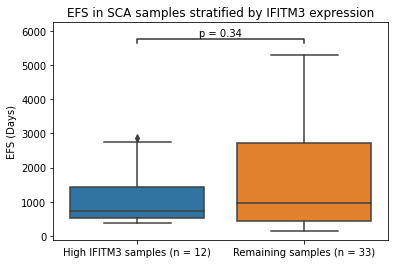

High IFITM3 samples: median = 724.0, mean = 1172.1666666666667, 95% CI = (634.3962151420818, 1709.9371181912516)
Remaining samples: median = 964.0, mean = 1646.909090909091, 95% CI = (1095.5798124751054, 2198.2383693430766)


In [58]:
not_high_IFITM3_sca_samples = list(set(sca_samples) - set(high_IFITM3_sca_samples))
data = [high_IFITM3_sca_samples,not_high_IFITM3_sca_samples]
compareEFS2(data, 'EFS in SCA samples stratified by IFITM3 expression', ['High IFITM3 samples','Remaining samples'],'t-test_ind')




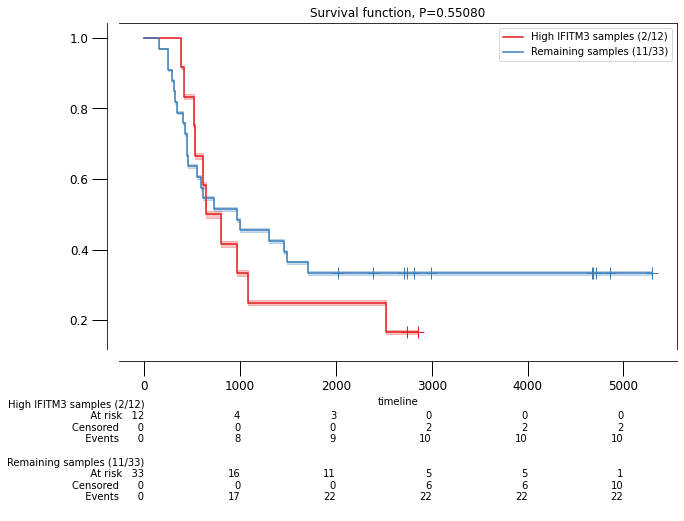

In [59]:
kaplanmeierEFS(data,'High IFITM3 samples','Remaining samples')




# Compare EFS in samples without SCAs stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=1.506e-01 stat=-1.920e+00
Intermediate v.s. High: t-test independent samples, P_val=6.762e-01 stat=4.333e-01
Low v.s. High: t-test independent samples, P_val=2.543e-01 stat=-1.242e+00


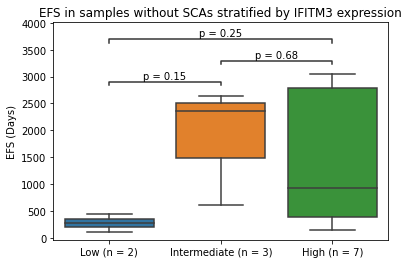

Low: median = 273.0, mean = 273.0, 95% CI = (-50.394057449108914, 596.3940574491089)
Intermediate: median = 2365.0, mean = 1871.0, 95% CI = (621.45519561826, 3120.54480438174)
High: median = 932.0, mean = 1491.7142857142858, 95% CI = (514.8537273656177, 2468.574844062954)


In [7]:
#Find z-scores for non-sca samples
non_sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(non_sca_samples).intersection(z_scores.columns))
non_sca_z_scores = z_scores[non_sca_columns]

#Obtain the IFITM3 z-scores in non-sca samples
IFITM3_non_sca_z_scores = non_sca_z_scores.loc[non_sca_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_non_sca_samples = IFITM3_non_sca_z_scores.loc[IFITM3_non_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_non_sca_samples = IFITM3_non_sca_z_scores.loc[IFITM3_non_sca_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_non_sca_samples = intermediate_IFITM3_non_sca_samples.loc[intermediate_IFITM3_non_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_non_sca_samples = IFITM3_non_sca_z_scores.loc[IFITM3_non_sca_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_non_sca_samples,intermediate_IFITM3_non_sca_samples,high_IFITM3_non_sca_samples]
compareEFS2(data, 'EFS in samples without SCAs stratified by IFITM3 expression', ['Low','Intermediate','High'],'t-test_ind')



Remaining samples v.s. High IFITM3 samples: t-test independent samples, P_val=7.329e-01 stat=-3.510e-01


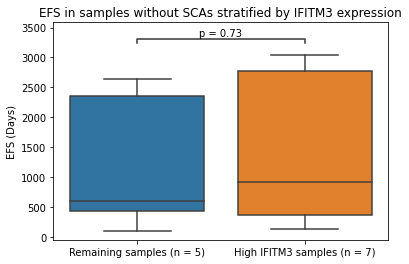

Remaining samples: median = 606.0, mean = 1231.8, 95% CI = (198.6296782678337, 2264.970321732166)
High IFITM3 samples: median = 932.0, mean = 1491.7142857142858, 95% CI = (514.8537273656177, 2468.574844062954)


In [60]:
high_IFITM3_non_sca_samples = IFITM3_non_sca_z_scores.loc[IFITM3_non_sca_z_scores.iloc[:,0] > 0.5].index
not_high_IFITM3_non_sca_samples = IFITM3_non_sca_z_scores.loc[IFITM3_non_sca_z_scores.iloc[:,0] < 0.5].index

data = [not_high_IFITM3_non_sca_samples,high_IFITM3_non_sca_samples]
compareEFS2(data, 'EFS in samples without SCAs stratified by IFITM3 expression', ['Remaining samples','High IFITM3 samples'],'t-test_ind')

